### __Loading data + synching them__

In [ ]:
%load_ext autoreload
%autoreload 2

### __Texture Mapping__

In [2]:
from modules.ogm import *
from modules.utils import *
from modules.sensors import *
from modules.localization import *
from modules.texture_mapping import *
from modules.pose_graph_optimization import *

import numpy as np
from math import radians as rd
import matplotlib.pyplot as plt

#----------------------------------------------------------------------------
# Loading data and syncing sensors
dataset_num = 20 # or 21
dataset_names = {
    "encoder": "Encoders",
    "lidar": "Hokuyo",
    "imu": "Imu",
    "rgbd": "Kinect",
}

data = load_data(dataset_num, dataset_names)
encoder = Encoder(data["encoder"])
lidar = Lidar(data["lidar"])
imu = Imu(data["imu"])
kinect = Kinect(data["rgbd"])

synchronize_sensors(encoder, imu, lidar, base_sensor_index=0)
#----------------------------------------------------------------------------

# Estimate poses
z_ts = get_lidar_data(lidar.ranges_synced, lidar.range_min, lidar.range_max)
v_ts = encoder.counts_synced
w_ts = imu.gyro_synced
poses_odom, relative_poses_odom = poses_from_odometry(v_ts, w_ts, return_relative_poses=True)
poses_scan_matching, relative_poses_scan_matching = poses_from_scan_matching(poses_odom, z_ts, return_relative_poses=True)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


100%|███████████████████████████████████████████████████████████████████| 4955/4955 [04:50<00:00, 17.05it/s]


In [3]:
save_numpy(poses_odom, "poses_odom.npy")
save_numpy(relative_poses_odom, "relative_poses_odom.npy")
save_numpy(poses_scan_matching, "poses_scan_matching.npy")
save_numpy(relative_poses_scan_matching, "relative_poses_scan_matching.npy")

In [4]:
poses_odom = load_numpy("poses_odom.npy")
relative_poses_scan_matching = load_numpy("relative_poses_scan_matching.npy")

In [5]:
optimized_poses = pose_graph_optimization(poses_odom, relative_poses_scan_matching)

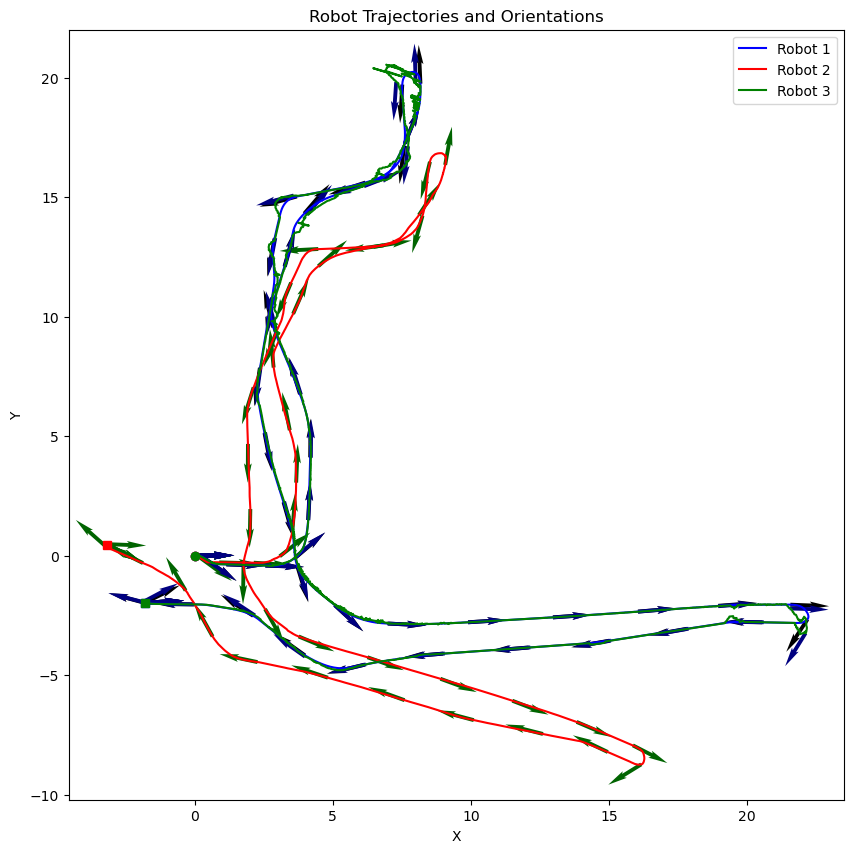

In [6]:
plot_N_trajectories([poses_odom, optimized_poses, poses_scan_matching])

In [ ]:
# #----------------------------------------------------------------------------
# # Build occupancy grid map
# # access map with ogm.grid_map, access log odd map with ogm.grid_map_log_odds
# res = 0.05
# ogm = OccupancyGridMap(res, 30., 30., -30., -30.)
# ogm.build_map(x_ts, z_ts)
# #----------------------------------------------------------------------------

In [ ]:
# ogm.plot_log_odds_map()

In [9]:
# ogm.plot_map()

In [10]:
# # Transformation from camera frame to robot's body frame (obtained from CAD)
# p_rc = np.array([0.16766, 0., 0.38001])
# R_rc = np.array([
#     [ np.cos(rd(18.)), 0, np.sin(rd(18.))],
#     [               0, 1,               0],
#     [-np.sin(rd(18.)), 0, np.cos(rd(18.))]
# ])
# T_rc = np.eye(4)
# T_rc[:3, :3]  = R_rc
# T_rc[:3,  3]  = p_rc

# # Camera's intrinsic matrix
# K = np.array([
#     [585.05,      0, 242.94],
#     [     0, 585.05, 315.84],
#     [     0,      0,      1]
# ])

# texture_map = generate_texture_map(
#     dataset_num,
#     x_ts,
#     kinect,
#     encoder,
#     ogm,
#     T_rc,
#     K
# )

In [11]:
# plot_texture_map(texture_map)